# Compiled solutions to the exercises in 2024 edition of Python for Life Science

In [6]:
# @title Setup
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

---
# Section 1: D1S1

In [8]:
# @title First program
user = 'Noah'

# greet USER
print(f'Hello {user}')

# we imagine lunch is 5s from now, night time 10s from now
lunchTime = dt.datetime.now() + dt.timedelta(seconds=3)
night_time = dt.datetime.now() + dt.timedelta(seconds=6)

message_counter = 0
print('Start of the work loop:', dt.datetime.now(), '\n', '---------')
while True:
    # this way you can slow down the loop, because you do not need TOP precision
    time.sleep(1)
    if dt.datetime.now() >= lunchTime and message_counter == 0:
        print(dt.datetime.now())
        print(f'{user}, go for lunch, otherwise your aptitude will drop!',
              '\n', '---------')
        message_counter = 1

    if dt.datetime.now() >= night_time:
        print(dt.datetime.now())
        print(f'{user}, go to sleep, otherwise you will not look great tomorrow!',
              '\n', '---------')
        break

print('Day is over, program exits')

Hello Noah
Start of the work loop: 2024-05-31 14:32:05.313872 
 ---------
2024-05-31 14:32:08.318541
Noah, go for lunch, otherwise your aptitude will drop! 
 ---------
2024-05-31 14:32:11.321545
Noah, go to sleep, otherwise you will not look great tomorrow! 
 ---------
Day is over, program exits


In [9]:
# @title exercise string methods
user = 'Noah'

In [10]:
user.upper()

'NOAH'

In [11]:
user.lower()

'noah'

In [12]:
user.lower()[::-1]

'haon'

In [14]:
user.replace('a', 'A')

'NoAh'

In [15]:
2*user

'NoahNoah'

In [16]:
user.count('a')

1

In [17]:
user.index('ah')

2

In [18]:
# @title Our ChatGPT answer to parsing text exercise
# Example text
text = """
The solar system consists of the Sun and the celestial objects that orbit it, \
including eight planets. The average distance from the Sun to Mercury \
is approximately 57.9 million kilometers, \
to Venus is approximately 108.2 million kilometers, \
to Earth is approximately 149.6 million kilometers, \
to Mars is approximately 227.9 million kilometers, \
to Jupiter is approximately 778.6 million kilometers,  \
to Saturn is approximately 1.4 billion kilometers, to Uranus is  \
approximately 2.9 billion kilometers, and to Neptune is approximately 4.5  \
billion kilometers.
"""
import re

numbers = re.findall(r'\b\d+(?:\.\d+)?(?:\s*(?:million|billion)?)?\b', text)

distances = []

for number in numbers:
    num_value, num_unit = number.split()
    num_value = float(num_value)
    print(num_value, num_unit)
    if num_unit == 'million':
        num_value *= 1e6
    elif num_unit == 'billion':
        num_value *= 1e9
    distances.append(num_value)

# Convert distances from kilometers to astronomical units (AU)
au_distances = [distance / 149.6e6 for distance in distances]

# Calculate the average distance in AU
average_distance = sum(au_distances) / len(au_distances)
print("Average distance of the planets from the Sun in astronomical units (AU):", average_distance)

57.9 million
108.2 million
149.6 million
227.9 million
778.6 million
1.4 billion
2.9 billion
4.5 billion
Average distance of the planets from the Sun in astronomical units (AU): 8.457720588235293


---
# Section 2: D2S1

In [19]:
# @title Sorting using conditionals

temps_madeira = [
    16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9
]

temps_portugal = [
    12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2
]

temps_azores = [
    14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6
]

mean_madeira = sum(temps_madeira)/len(temps_madeira)
mean_portugal = sum(temps_portugal)/len(temps_portugal)
mean_azores = sum(temps_azores)/len(temps_azores)

if mean_madeira <= mean_portugal and mean_madeira <= mean_azores:
  print(f'Mean temp for Madeira: {mean_madeira}')
  if mean_portugal <= mean_azores:
    print(f'Mean temp for Portugal: {mean_portugal}')
    print(f'Mean temp for Azores: {mean_azores}')
  else:
    print(f'Mean temp for Azores: {mean_azores}')
    print(f'Mean temp for Portugal: {mean_portugal}')
elif mean_portugal <= mean_madeira and mean_portugal <= mean_azores:
  print(f'Mean temp for Portugal: {mean_portugal}')
  if mean_madeira <= mean_azores:
    print(f'Mean temp for Madeira: {mean_madeira}')
    print(f'Mean temp for Azores: {mean_azores}')
  else:
    print(f'Mean temp for Azores: {mean_azores}')
    print(f'Mean temp for Madeira: {mean_madeira}')
else:
  print(f'Mean temp for Azores: {mean_azores}')
  if mean_madeira <= mean_portugal:
    print(f'Mean temp for Madeira: {mean_madeira}')
    print(f'Mean temp for Portugal: {mean_portugal}')
  else:
    print(f'Mean temp for Portugal: {mean_portugal}')
    print(f'Mean temp for Madeira: {mean_madeira}')

Mean temp for Azores: 17.275000000000002
Mean temp for Portugal: 17.716666666666665
Mean temp for Madeira: 19.558333333333334


---
# Section 3: D2S2

In [20]:
# lets define a sequence
temps_portugal = [
    12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2
]

temps_azores = [
    14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6
]

In [53]:
# @title Calculate differences

diff = []

for i in range(len(temps_portugal)):
    diff.append(temps_portugal[i] - temps_azores[i])

diff

[-2.0999999999999996,
 -1.5999999999999996,
 0.0,
 1.3000000000000007,
 2.1999999999999993,
 3.0,
 3.5,
 2.8000000000000007,
 1.0,
 -0.40000000000000213,
 -2.0000000000000018,
 -2.4000000000000004]

In [ ]:
# Correct structure which helps your collaborators and you after one month of not coding
def monthlyDiffTempProper(place1: list, place2: list) -> list:
    """ Calculate difference in monthly temperatures between
    place1 and place2 using place1 - place2.

    Args:
        place1 (list): Monthly temperatures at place1
        place2 (list): Monthly temperatures at place2

    Returns:
        diff_temps (list): Difference in temperatures between places

    Raises:
        ValueError: if inputs are not length 12.
    """
    # check if both lists are of length of 12
    if len(place1) != 12 or len(place2) != 12:
        raise ValueError('Both input lists must contain 12 values.')

    diff_temps = []

    # iterate over both list and calculate differece
    for t1, t2 in zip(place1, place2):
        diff_temps.append(t1 - t2)
    return diff_temps

In [23]:
# @title Using numpy
diff = np.array(temps_portugal) - np.array(temps_azores)
diff

array([-2.1, -1.6,  0. ,  1.3,  2.2,  3. ,  3.5,  2.8,  1. , -0.4, -2. ,
       -2.4])

In [27]:
# @title covarience
x = np.array(temps_portugal)
y = np.array(temps_azores)
((x-x.mean())*(y-y.mean())).sum()/(len(x)-1)

11.48318181818182

In [28]:
# @title Pearsons
def covar(x,y):
  return ((x-x.mean())*(y-y.mean())).sum()/(len(x)-1)

def pearson(x,y):
  return covar(x,y)/(np.sqrt(covar(x,x))*np.sqrt(covar(y,y)))

pearson(x,y)

0.9096074581493356

In [29]:
np.corrcoef(x,y)

array([[1.        , 0.90960746],
       [0.90960746, 1.        ]])

In [30]:
np.cov(x,y)[0,1]

11.48318181818182

In [34]:
# @title Reading file solution
# setup
%%writefile temp_example_data.txt
Month,Temperature
January,5.0
February,6.1
March,10.2
April,15.3
May,20.4
June,25.5
July,30.6
August,29.7
September,24.8
October,18.9
November,10.0
December,5.1

Overwriting temp_example_data.txt


In [36]:
with open('temp_example_data.txt', 'r') as file:
    lines = file.readlines()

months = []
temperatures = []

# Skip the header line
for line in lines[1:]:
    month, temp = line.strip().split(',')
    months.append(month)
    temperatures.append(float(temp))

temperatures

[5.0, 6.1, 10.2, 15.3, 20.4, 25.5, 30.6, 29.7, 24.8, 18.9, 10.0, 5.1]

In [51]:
# using numpy
lines = np.loadtxt('temp_example_data.txt', delimiter=',', skiprows=1, usecols=(1,))
months = np.loadtxt('temp_example_data.txt', delimiter=',', skiprows=1, dtype='str',usecols=(0,))

In [52]:
lines, months

(array([ 5. ,  6.1, 10.2, 15.3, 20.4, 25.5, 30.6, 29.7, 24.8, 18.9, 10. ,
         5.1]),
 array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'],
       dtype='<U9'))

---
# Section 4: D3S1

In [54]:
%%writefile my_module.py

# Correct structure which helps your collaborators and you after one month of not coding
def monthlyDiffTempProper(place1: list, place2: list) -> list:
    """ Calculate difference in monthly temperatures between
    place1 and place2 using place1 - place2.

    Args:
        place1 (list): Monthly temperatures at place1
        place2 (list): Monthly temperatures at place2

    Returns:
        diff_temps (list): Difference in temperatures between places

    Raises:
        ValueError: if inputs are not length 12.
    """
    # check if both lists are of length of 12
    if len(place1) != 12 or len(place2) != 12:
        raise ValueError('Both input lists must contain 12 values.')

    diff_temps = []

    # iterate over both list and calculate differece
    for t1, t2 in zip(place1, place2):
        diff_temps.append(t1 - t2)
    return diff_temps

Writing my_module.py


In [55]:
import my_module

In [59]:
# my_module.monthlyDiffTempProper([1, 2, 3], [3, 4, 5])

In [57]:
from my_module import monthlyDiffTempProper

In [58]:
from my_module import monthlyDiffTempProper as diff

In [65]:
# @title Extending argparse

%%writefile monthly_temp_argparse.py
#!usr/bin/bash python

import argparse
import numpy as np
import matplotlib.pyplot as plt

tempData = {
    'Portugal':[12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2],
    'Azores': [14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6],
    'Madeira': [16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9],
}

months = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

def main():
    parser = argparse.ArgumentParser(description="Calculate mean temperature and plot monthly graph")
    parser.add_argument('country', metavar='N', type=str, nargs='+', default=[])

    args = parser.parse_args()

    for country in args.country:
      print(f"Average yearly temperature in {country} is {np.round(np.mean(tempData[country]), 2)}.")

      plt.plot(months, tempData[country], label=country)
    plt.title(f'Monthly temperature in {args.country}.')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

Overwriting monthly_temp_argparse.py


Average yearly temperature in Portugal is 17.72.
Average yearly temperature in Azores is 17.28.


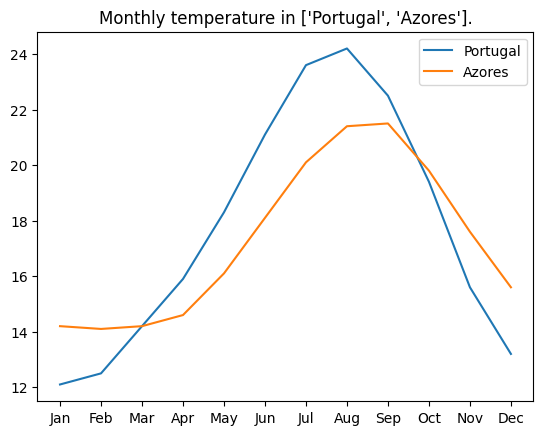

<Figure size 640x480 with 0 Axes>

In [67]:
%run monthly_temp_argparse.py 'Portugal' 'Azores'

---
# Section 5: D3S2


In [69]:
grades = pd.read_csv("https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/grades_dataset.csv")

In [70]:
#@title solution 1.
grades.loc[11] = ['Tyrion',15.2,16.7,16.0]
grades.loc[12] = ['Bronn',17.0,15.2,17.7]
grades
# Note: you must an index value outside the range 0-11 or else will
# overwrite data rows (tow rows cannot have the same index)

,Name,1st Test,2nd Test,3rd Test
0,Brienne,7.50,10.55,11.40
1,Jaime,11.25,12.15,8.15
2,Jon,12.95,10.95,11.45
3,Arya,12.20,8.25,11.50
4,Bran,16.85,17.20,20.00
5,Sansa,14.50,15.75,15.15
6,Sam,16.85,16.25,18.00
7,Varys,15.60,11.80,16.75
8,Cersei,12.40,11.80,6.00
9,Jorah,7.50,8.85,8.80


In [71]:
#@title SOLUTION 2.
grades['Average'] = grades.iloc[:,1:4].mean(axis=1)
grades

,Name,1st Test,2nd Test,3rd Test,Average
0,Brienne,7.50,10.55,11.40,9.816667
1,Jaime,11.25,12.15,8.15,10.516667
2,Jon,12.95,10.95,11.45,11.783333
3,Arya,12.20,8.25,11.50,10.650000
4,Bran,16.85,17.20,20.00,18.016667
5,Sansa,14.50,15.75,15.15,15.133333
6,Sam,16.85,16.25,18.00,17.033333
7,Varys,15.60,11.80,16.75,14.716667
8,Cersei,12.40,11.80,6.00,10.066667
9,Jorah,7.50,8.85,8.80,8.383333


In [72]:
#@title SOLUTION 2. (alternative solution)
grades['Average'] = grades.loc[:,'1st Test':'3rd Test'].mean(axis=1)
grades

,Name,1st Test,2nd Test,3rd Test,Average
0,Brienne,7.50,10.55,11.40,9.816667
1,Jaime,11.25,12.15,8.15,10.516667
2,Jon,12.95,10.95,11.45,11.783333
3,Arya,12.20,8.25,11.50,10.650000
4,Bran,16.85,17.20,20.00,18.016667
5,Sansa,14.50,15.75,15.15,15.133333
6,Sam,16.85,16.25,18.00,17.033333
7,Varys,15.60,11.80,16.75,14.716667
8,Cersei,12.40,11.80,6.00,10.066667
9,Jorah,7.50,8.85,8.80,8.383333


In [73]:
#@title SOLUTION 3.
grades.loc['test_averages'] = grades.iloc[:,1:5].mean(axis=0)
grades

,Name,1st Test,2nd Test,3rd Test,Average
0,Brienne,7.500000,10.550000,11.400000,9.816667
1,Jaime,11.250000,12.150000,8.150000,10.516667
2,Jon,12.950000,10.950000,11.450000,11.783333
3,Arya,12.200000,8.250000,11.500000,10.650000
4,Bran,16.850000,17.200000,20.000000,18.016667
5,Sansa,14.500000,15.750000,15.150000,15.133333
6,Sam,16.850000,16.250000,18.000000,17.033333
7,Varys,15.600000,11.800000,16.750000,14.716667
8,Cersei,12.400000,11.800000,6.000000,10.066667
9,Jorah,7.500000,8.850000,8.800000,8.383333


In [74]:
#@title SOLUTION 4.
grades.loc[grades.Average >= 9.5, 'Status'] = 'Pass'
grades.loc[grades.Average < 9.5, 'Status'] = 'Fail'
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail


In [75]:
#@title SOLUTION 4. (alternate solution)
import numpy as np
grades['Status'] = np.where(grades['Average']>=9.5, 'Pass', 'Fail')
grades
# Can you understand how this works ?

,Name,1st Test,2nd Test,3rd Test,Average,Status
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail


In [76]:
#@title SOLUTION 6.
grades = grades.sort_values('Average')
# by default, sort_values is not an in place operation!
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail
10,Daenerys,9.500000,10.000000,6.500000,8.666667,Fail
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Pass
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
test_averages,NaN,13.023077,12.726923,12.876923,12.875641,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass


In [77]:
#@title SOLUTION 6. (alternative solution)
grades.sort_values('Name',inplace = True)
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
12,Bronn,17.000000,15.200000,17.700000,16.633333,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Pass
10,Daenerys,9.500000,10.000000,6.500000,8.666667,Fail
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass
